# Linear Regressioin on Bike sharing data

### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


Company wants to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    * Which variables are significant in predicting the demand for shared bikes.
    * How well those variables describe the bike demands
    
#### Business Goal:
    -- Model the demand for shared bikes with the available independent variables. 
    -- It will be used by the management to understand how exactly the demands vary with different features. 

# Step - 1 : Reading and Understanding the data

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
from sklearn.model_selection import train_test_split 

In [4]:
from sklearn.preprocessing import MinMaxScaler              

In [5]:
import statsmodels.api as sm

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
from sklearn.metrics import r2_score

In [9]:
# Reading the datset

df = pd.read_csv('day.csv')

In [10]:
# Checking first few rows to see how the data looks

df.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510


=========================================

Dataset characteristics

=========================================	

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [11]:
# Shape of df

df.shape              #  "df"  has  730 rows and 16 Columns

(730, 16)

In [12]:
# Checking too see if there are any NULL column in the datset

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# Checking the NULL value in terms of - Percentage of NULL values in each column

df.isnull().sum() / df.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [14]:
# Checking the info about df columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [15]:
# Describing df columns

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Observation - 1:

    -- There are total 730 rows and 16 Columns in the dataframe.
    -- There are no null values in any of the 16 columns.

### Checking for any unwanted columns in the df, so they can be dropped

In [16]:
 df['instant'].value_counts()  
    
# This can be dropped as it looks like similar to a serial number column.
# All the 730 rows are distinct

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64

In [17]:
# 'dteday' is also not required as we have 'weekday' , 'mnth' and 'yr' based on which we can know the date day

df['dteday'].value_counts()

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64

In [18]:
# Looks like 'Casual' and 'registered' can also be dropped as we have 'cnt' which is the sum of the two.

## Observation - 2:

    -- 'instant' columns can be dropped.
    -- 'dteday' --> This is also not required as we have 'weekday', 'mnth' and 'yr' based on which we can know the date day.
    -- 'Casual' and 'registered' can also be dropped as we have 'cnt' which is the sum of the two.

In [19]:
### We will drop  'dteday', 'Casual' and 'registered' after drawing someinsights from this columns.
### We are dropping this 3 columns as this is not required during Linear Regression. 
### The idea is to reduce the number of columns before doing Linear Regression.

In [20]:
### Checking the day where the 'cnt' i.e., usage is MAXIMUM and MINIMUM

In [21]:
df['cnt'].max()

8714

In [22]:
df['cnt'].min()

22

In [23]:
df[df['cnt'] == df['cnt'].max()]['dteday']       # 'cnt' i.e., usage is Maximum on  '15-09-2019'

622    15-09-2019
Name: dteday, dtype: object

In [24]:
df[df['cnt'] == df['cnt'].max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
622,623,15-09-2019,3,1,9,0,6,0,1,24.941653,29.29335,50.1667,16.583907,3160,5554,8714


In [25]:
df[df['cnt'] == df['cnt'].min()]['dteday']     # 'cnt' i.e., usage is minimum on '29-10-2019'

666    29-10-2019
Name: dteday, dtype: object

In [26]:
df[df['cnt'] == df['cnt'].min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
666,667,29-10-2019,4,1,10,0,1,1,3,18.04,21.97,88.0,23.9994,2,20,22


## Observation - 3:

    -- On September 15, 2019, the application reached its usage peak, hosting a record-breaking 8714 users
    -- On October 10, 2019, the application recorded its lowest user count, which stood at just 22 users.

In [27]:
# Checking if there are any days where 'casual' users used the app more than 'registered' users

df[df['registered'] < df['casual']]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
92,93,03-04-2018,2,0,4,0,0,0,1,15.511653,18.93835,48.0000,12.208271,1651,1598,3249
184,185,04-07-2018,3,0,7,1,1,0,2,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
246,247,04-09-2018,3,0,9,0,0,0,1,29.075847,33.27145,74.2083,13.833289,2521,2419,4940


## Observation - 4:

    -- On three specific dates, namely '03-04-2018', '04-07-2018', and '04-09-2018', the application experienced higher usage among 'casual' users compared to 'registered' users.

#### Dropping the 4 unwanted columns we identified

In [28]:
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [29]:
# Checking the data randomly after dropping the 4 unwanted columns we identified.

df.sample(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
218,3,0,8,0,0,0,1,30.442500,35.76460,75.2917,13.499629,3785
143,2,0,5,0,2,1,2,27.060000,30.24065,74.0833,13.875164,4492
453,2,1,3,0,5,1,2,15.170000,18.78105,58.0833,9.250489,5459
633,4,1,9,0,3,1,1,26.035000,29.83065,63.0833,16.374800,7733
398,1,1,2,0,5,1,1,12.846653,15.46730,52.6667,11.959232,4151


In [30]:
# Checking the shape of dropping the unwanted columns

df.shape

(730, 12)

#  Step - 2 : EDA - Visualising the data

In [31]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## 2.1 BIVARIATE Analysis

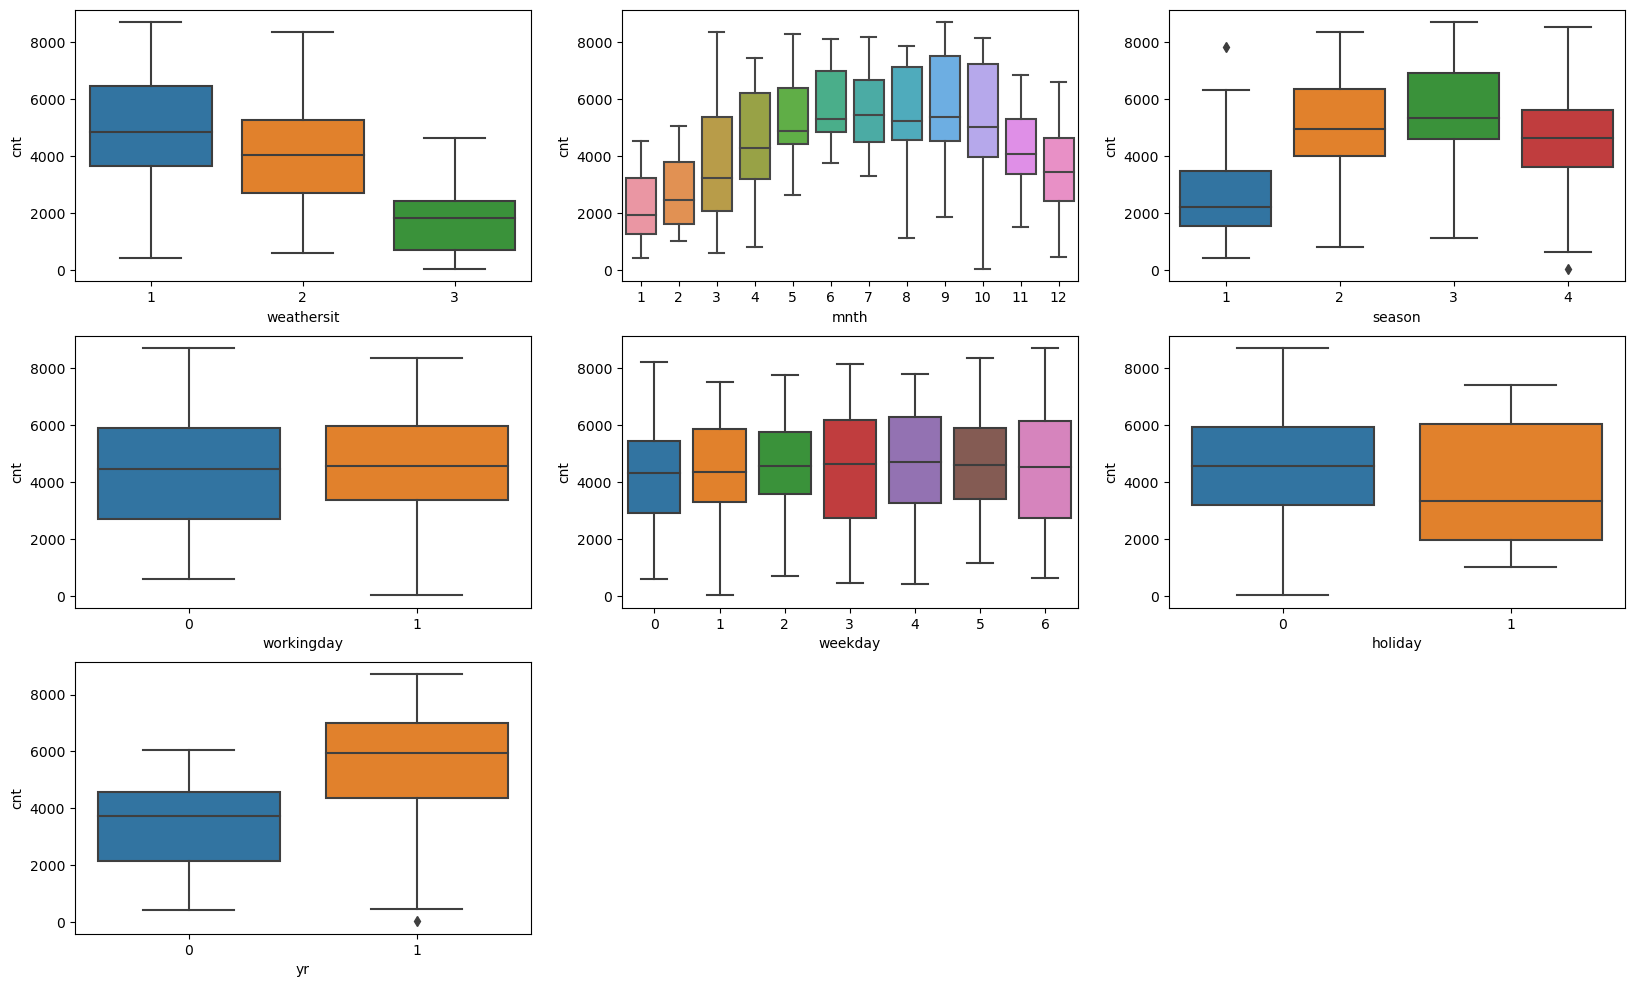

In [32]:

plt.figure(figsize=(20, 12))


plt.subplot(3,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)  

plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(3,3,3)
sns.boxplot(x = 'season', y = 'cnt', data = df)

plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)

plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)

plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)


plt.show()

In [33]:
# Checking on 'weathersit' values as plot shows only 3 distinct values instead of 4

print('Total rows in weatherlist : ',len(df['weathersit']))

print( df['weathersit'].value_counts() )

Total rows in weatherlist :  730
1    463
2    246
3     21
Name: weathersit, dtype: int64


As per data dictionary, weathersit will be having 4 values

	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

# Observation - 5:


    -- During EDA analysis on 'weathersit' column , we observed that the app was NOT used during '4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
    
    -- App is mostly used on weather conditions like '1: Clear, Few clouds, Partly cloudy, Partly cloudy' followed by '2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
    
    -- App is likely to be used during weather conditions like '3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
    
    -- Fall season has most ridership.
    
    -- The mean of user ridership is higher in 2019 than in 2018.
    

## 2.2 UNIVARIATE Analysis

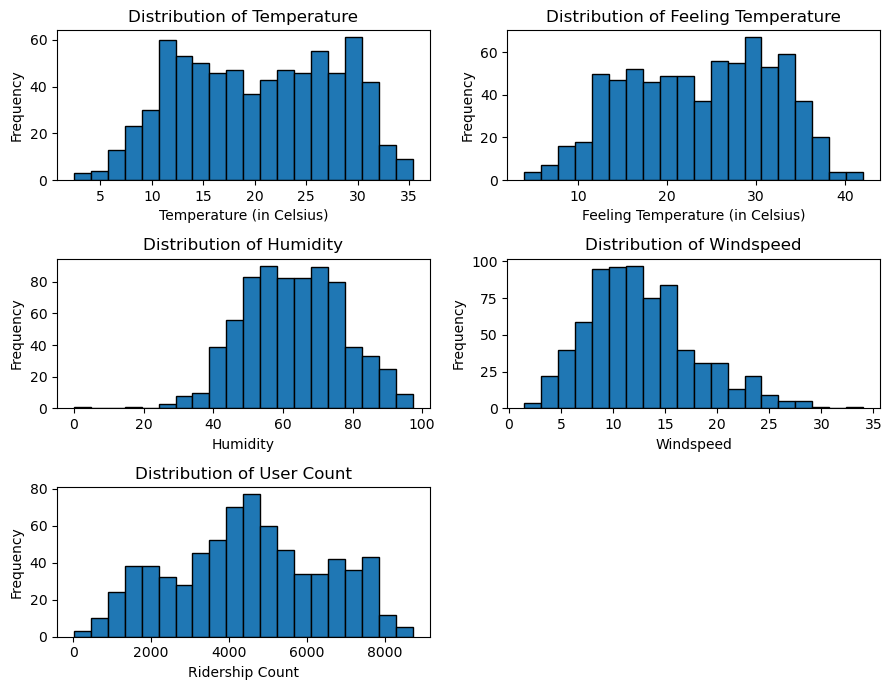

In [34]:
# Creating a grid of subplots

plt.figure(figsize=(9,7))


# 1. Plot histogram for 'temp' 
plt.subplot(3,2,1)
plt.hist(df['temp'], bins=20, edgecolor='black')
plt.xlabel('Temperature (in Celsius)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')


# 2. Histogram for 'atemp' 
plt.subplot(3,2,2)
plt.hist(df['atemp'], bins=20, edgecolor='black')
plt.xlabel('Feeling Temperature (in Celsius)')
plt.ylabel('Frequency')
plt.title('Distribution of Feeling Temperature')


# 3. Histogram for 'hum' 
plt.subplot(3,2,3)
plt.hist(df['hum'], bins=20, edgecolor='black')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Distribution of Humidity')


# 4. Histogram for 'windspeed' 
plt.subplot(3,2,4)
plt.hist(df['windspeed'], bins=20, edgecolor='black')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.title('Distribution of Windspeed')


# 5. Histogram for 'cnt' 
plt.subplot(3,2,5)
plt.hist(df['cnt'], bins=20, edgecolor='black')
plt.xlabel('Ridership Count')
plt.ylabel('Frequency')
plt.title('Distribution of User Count')


# To prevent overlapping of plots
plt.tight_layout()


plt.show()

## Observation - 6:

    -- After perfoming Univariate analysis on user count, the mean ridership counts appear to be around 4500.

## 2.3 SEGMENTED  Analysis

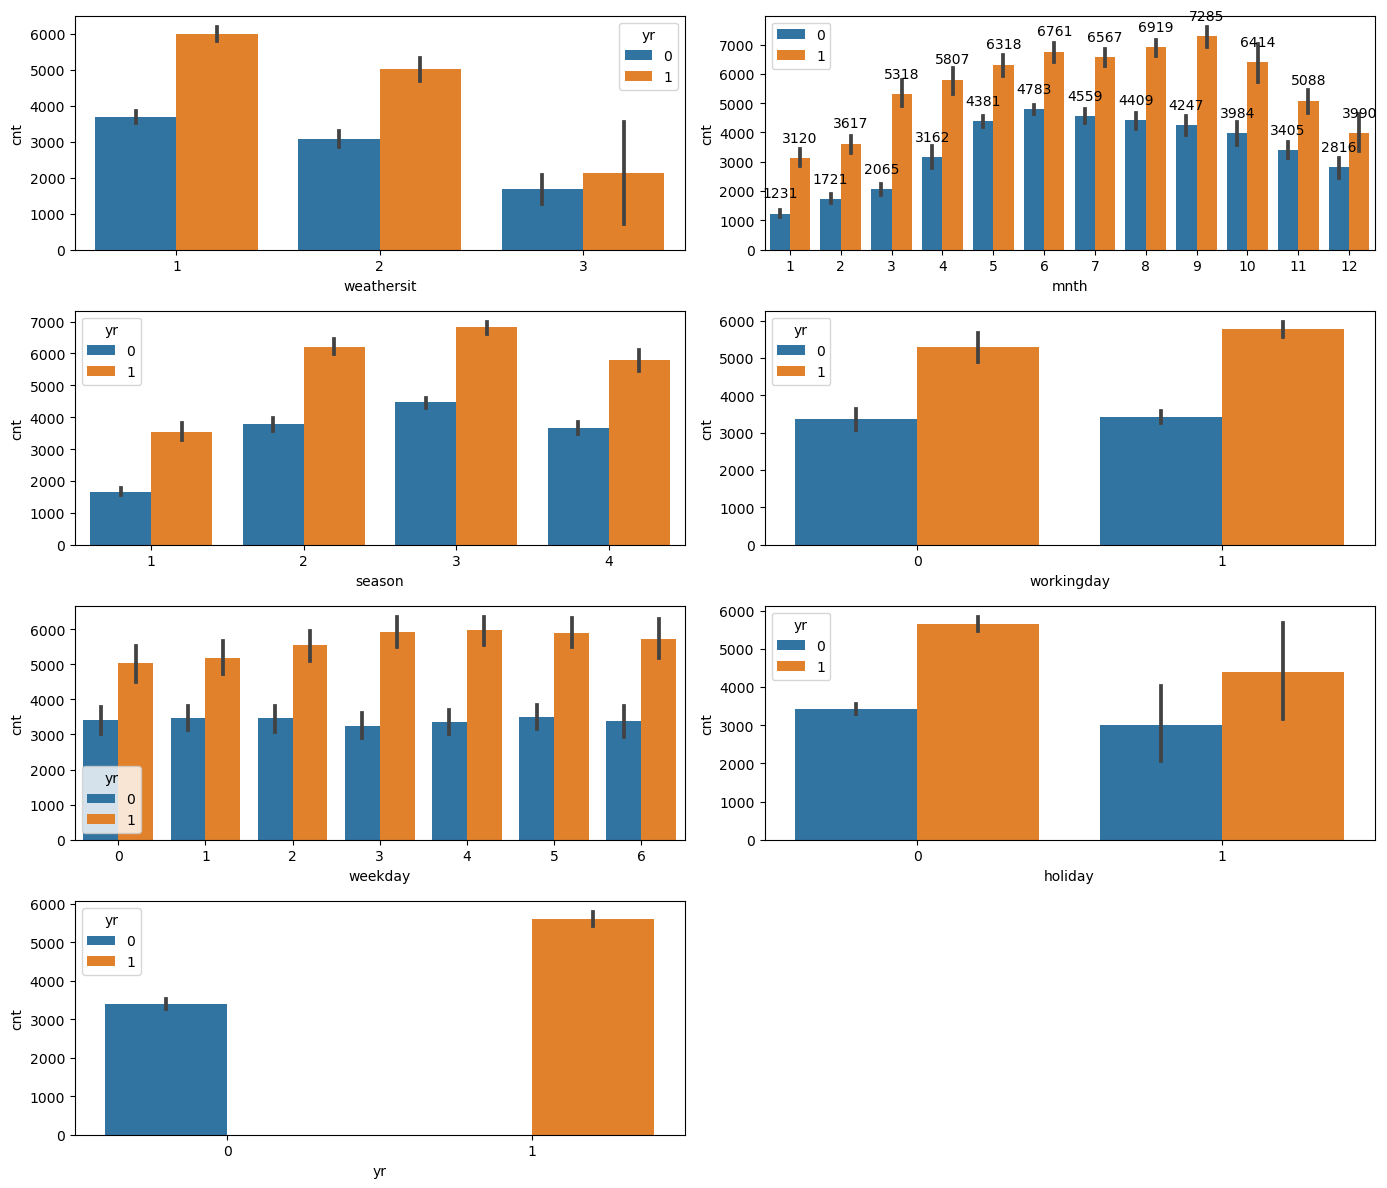

In [35]:
# The idea is to see how the ridership went in 2018  vs  2019 


plt.figure(figsize=(14,12))


plt.subplot(4,2,1)
sns.barplot(x = 'weathersit', y = 'cnt', data = df, hue='yr')  

plt.subplot(4,2,2)
ax = sns.barplot(x = 'mnth', y = 'cnt', data = df, hue='yr')

plt.subplot(4,2,3)
sns.barplot(x = 'season', y = 'cnt', data = df, hue='yr')

plt.subplot(4,2,4)
sns.barplot(x = 'workingday', y = 'cnt', data = df, hue='yr')

plt.subplot(4,2,5)
sns.barplot(x = 'weekday', y = 'cnt', data = df, hue='yr')

plt.subplot(4,2,6)
sns.barplot(x = 'holiday', y = 'cnt', data = df, hue='yr')

plt.subplot(4,2,7)
sns.barplot(x = 'yr', y = 'cnt', data = df, hue='yr')


# Define the vertical offset for annotations (adjust as needed)
vertical_offset = 450

# Annotate the bars with their respective values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + vertical_offset), ha='center', va='bottom')

# Move the legend to the top left corner
ax.legend(loc='upper left')

# To prevent overlapping of plots
plt.tight_layout()

plt.show()

## Observation - 7:

    -- After doing a segmented Analysis on hue being the year, we can see that the ridership i.e usage count is significantly more in 2019 compared to 2018 in all parameters.
    
    -- In 2018, the peak ridership occurred in the 6th month, reaching 4,783 riders. In contrast, in 2019, the peak ridership was observed in the 9th month, with a count of 7,285 riders.

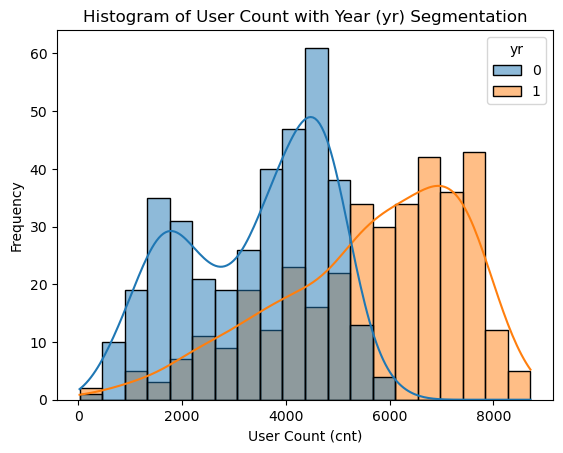

In [36]:
# Create a histogram of 'cnt' with 'yr' as hue

sns.histplot(data=df, x='cnt', hue='yr', bins=20, kde=True)

# Add labels and a title
plt.xlabel('User Count (cnt)')
plt.ylabel('Frequency')
plt.title('Histogram of User Count with Year (yr) Segmentation')

# Show the plot
plt.show()


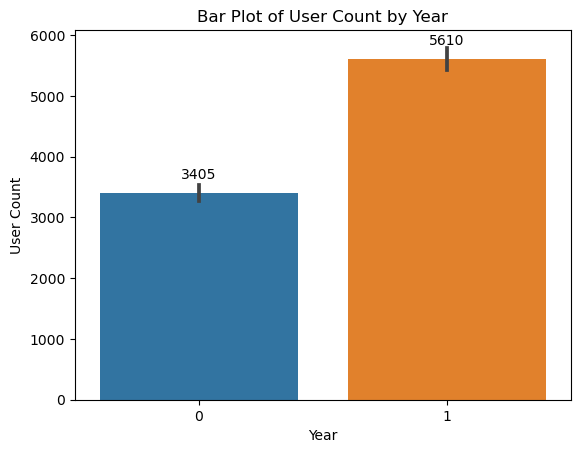

In [37]:
# Create a bar plot for 'cnt' and 'yr'
ax = sns.barplot(data=df, x='yr', y='cnt')

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('User Count')
plt.title('Bar Plot of User Count by Year')


# Define the vertical offset for annotations (adjust as needed)
vertical_offset = 175

# Annotate the bars with their respective values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + vertical_offset), ha='center', va='bottom')

# Show the plot
plt.show()

## Observation - 8:

    * In 2018, the ridership count reached 3,405, while it significantly increased to 5,610 in 2019. 
    * This observation indicates a substantial year-over-year growth in ridership, highlighting the positive trend in user engagement with the service.

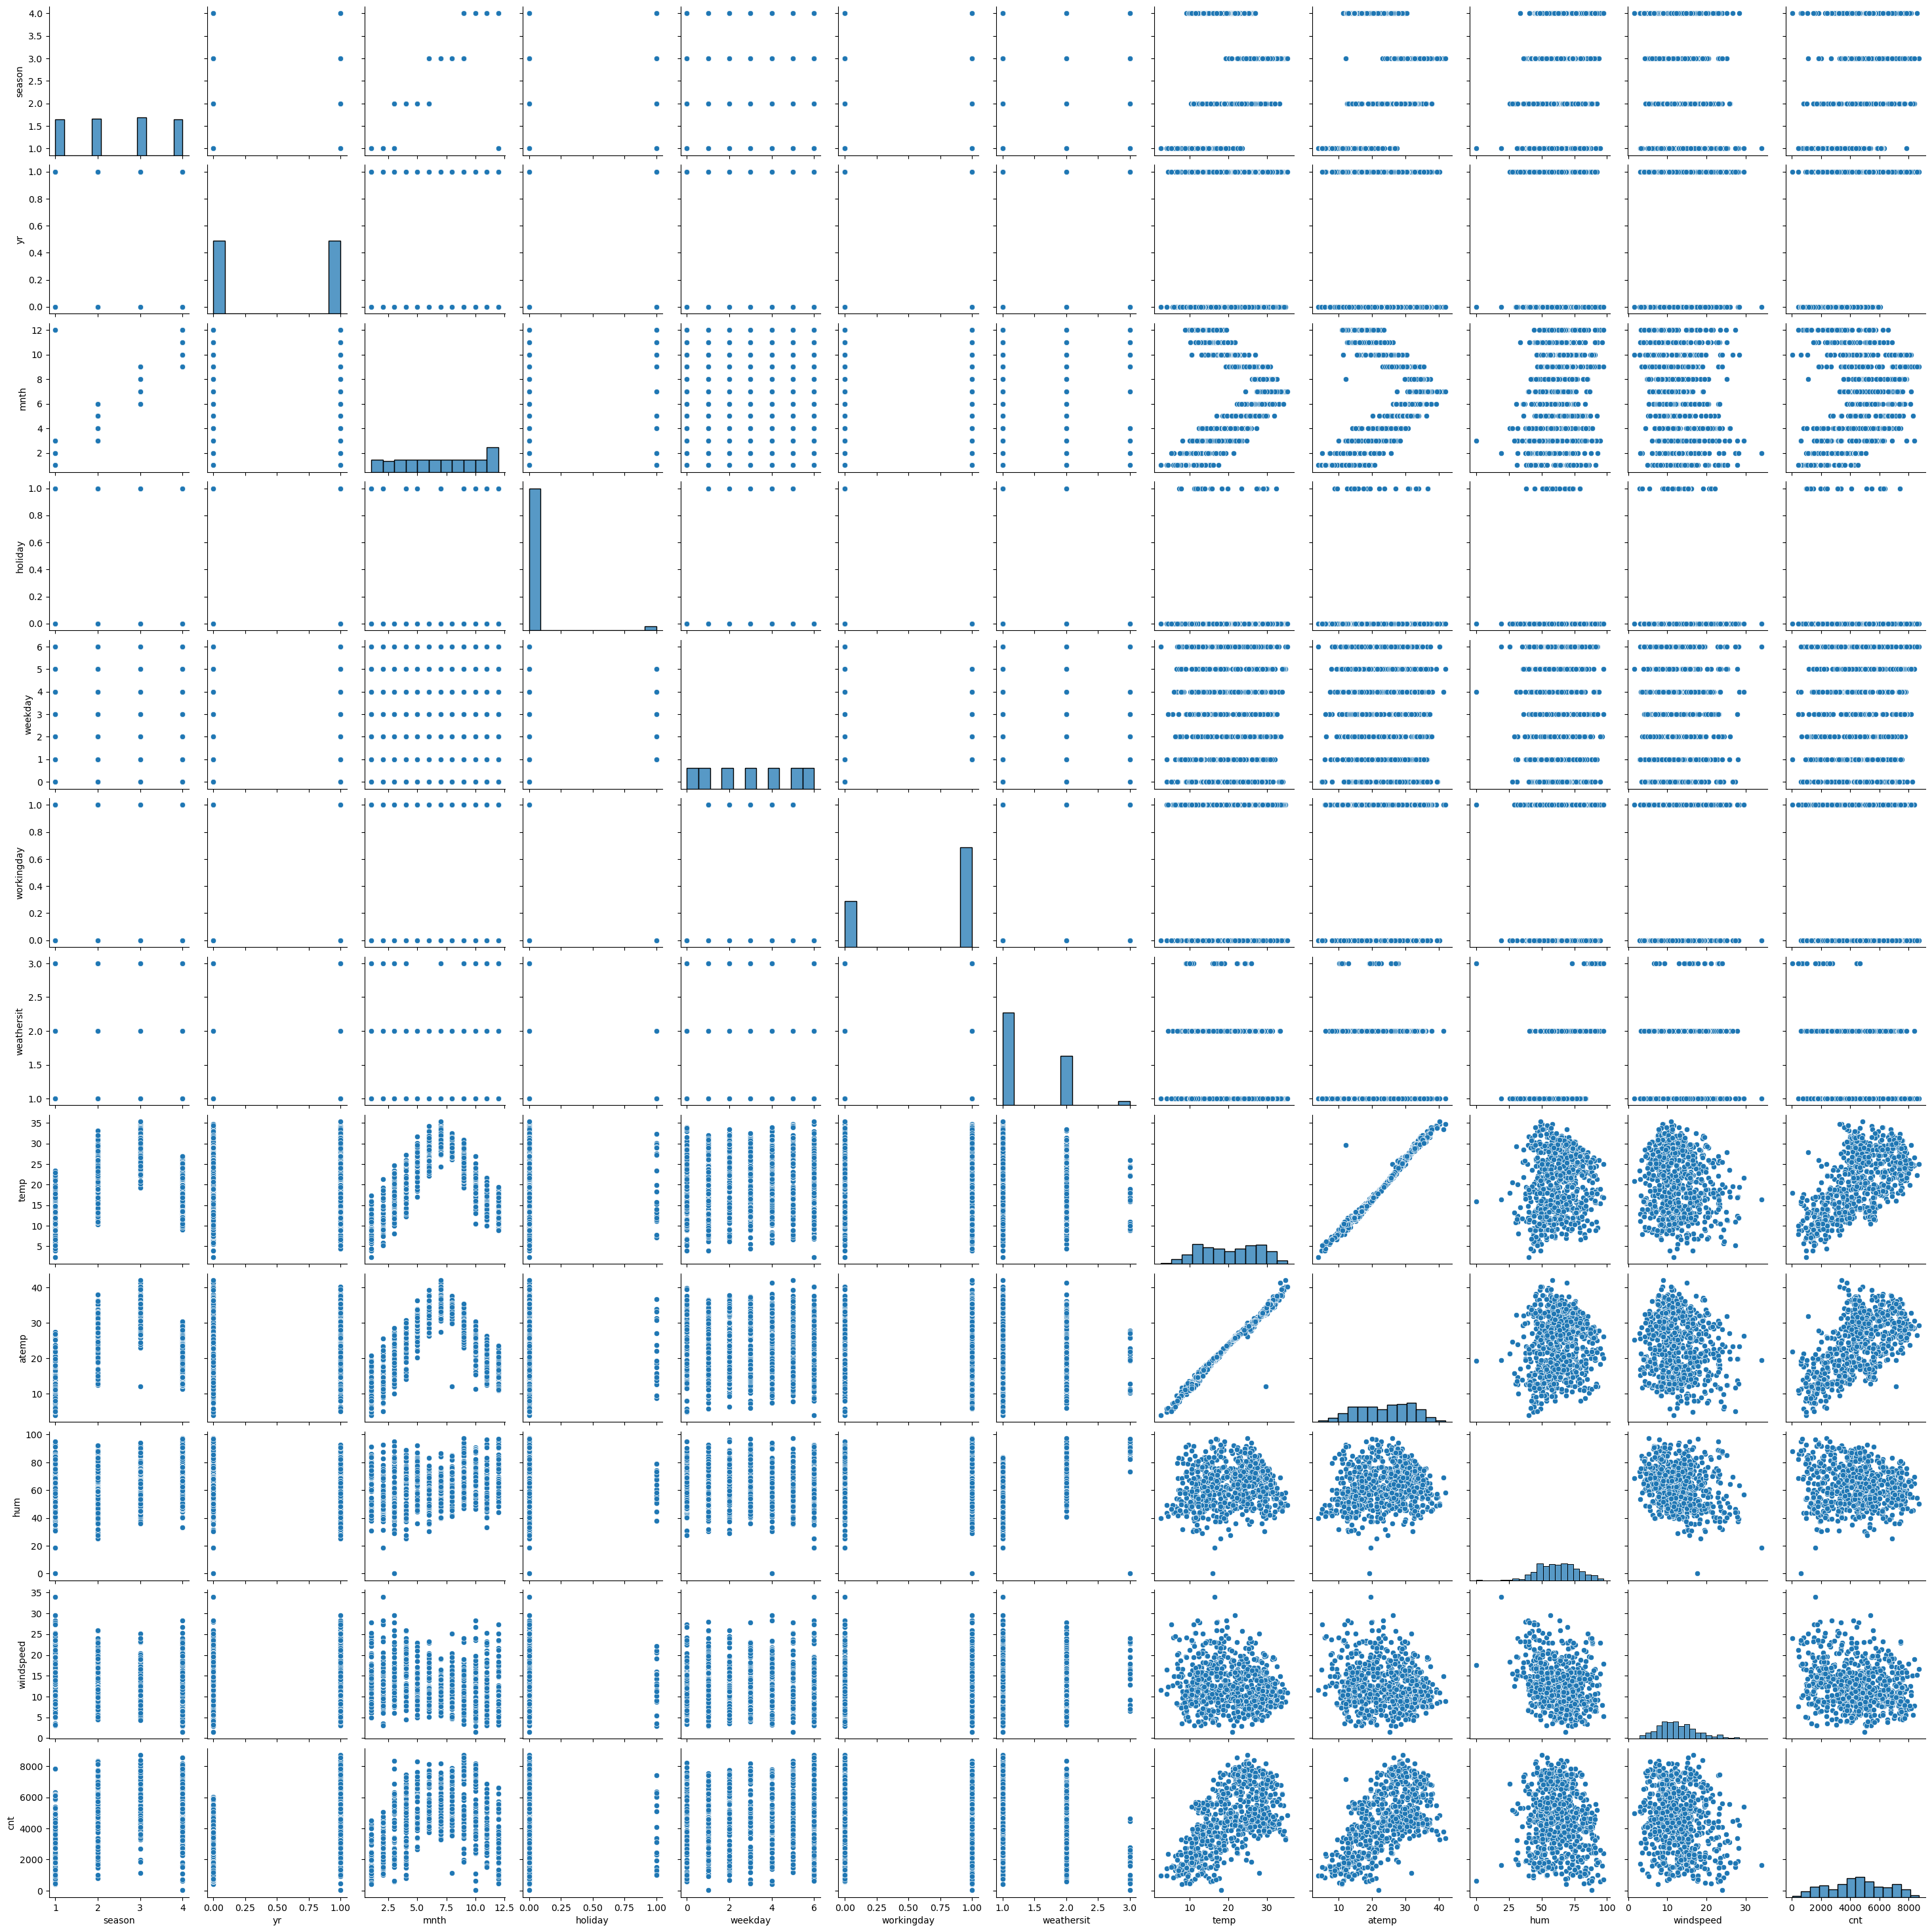

In [38]:
# Pairplot on the dataframe for Linear Regression

sns.pairplot(df)

In [39]:
# Based on above pairplot, 
#    -- there seems to be some relation ship between these variables - 'cnt', 'temp', 'atemp', 'hum','windspeed'.
# So plotting for thoose parameters only to see how it looks in a closeup

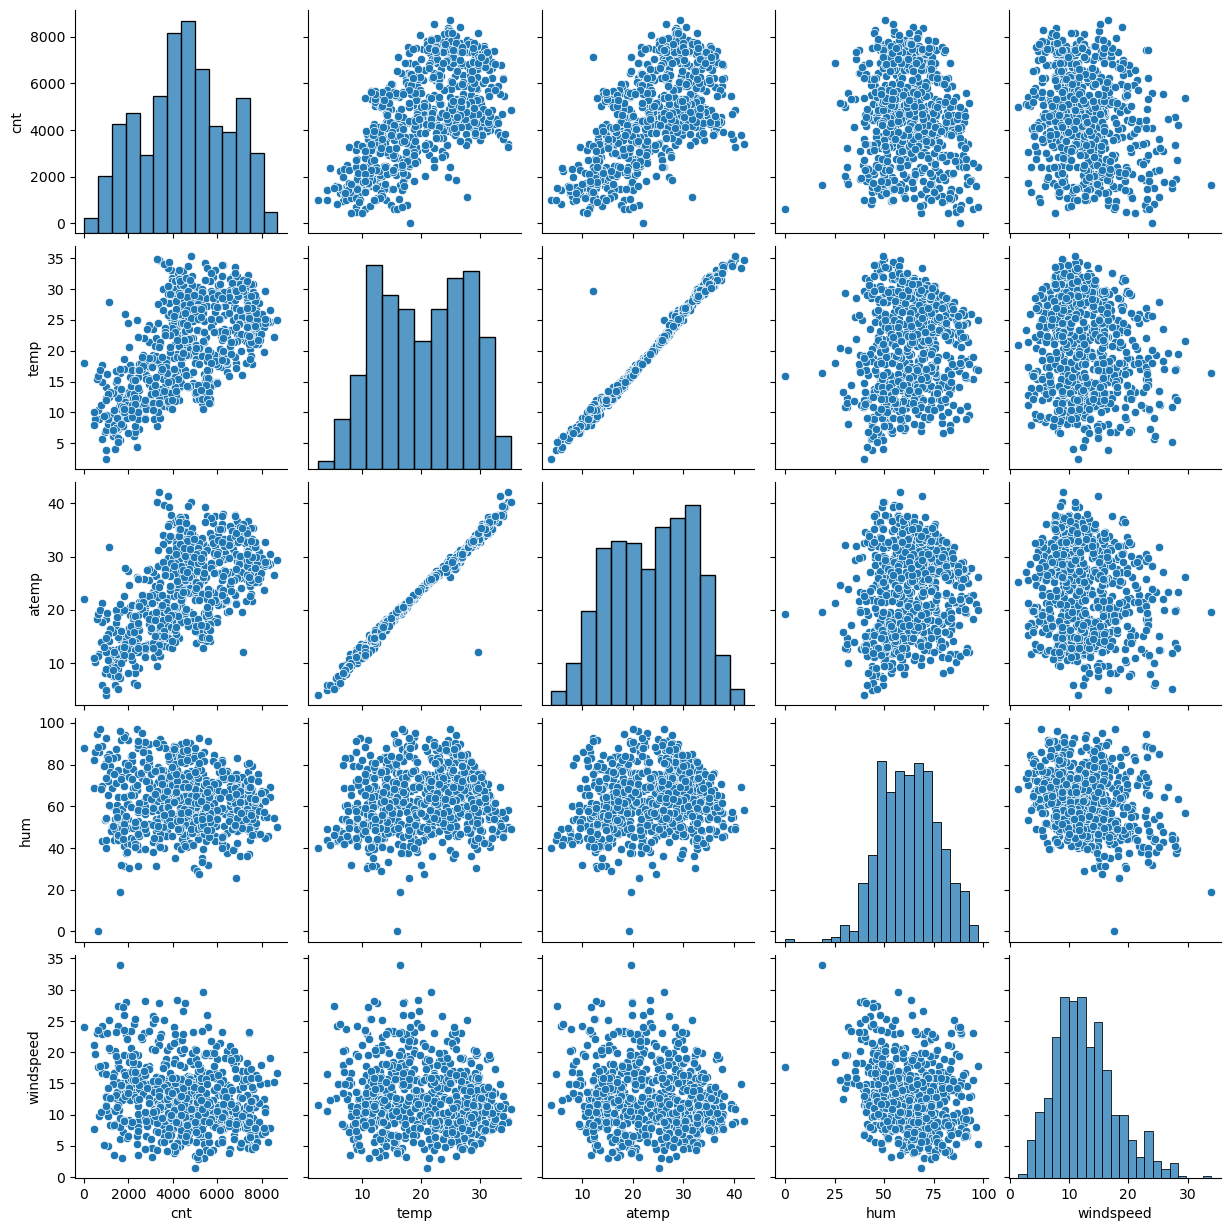

In [40]:
sns.pairplot(df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])

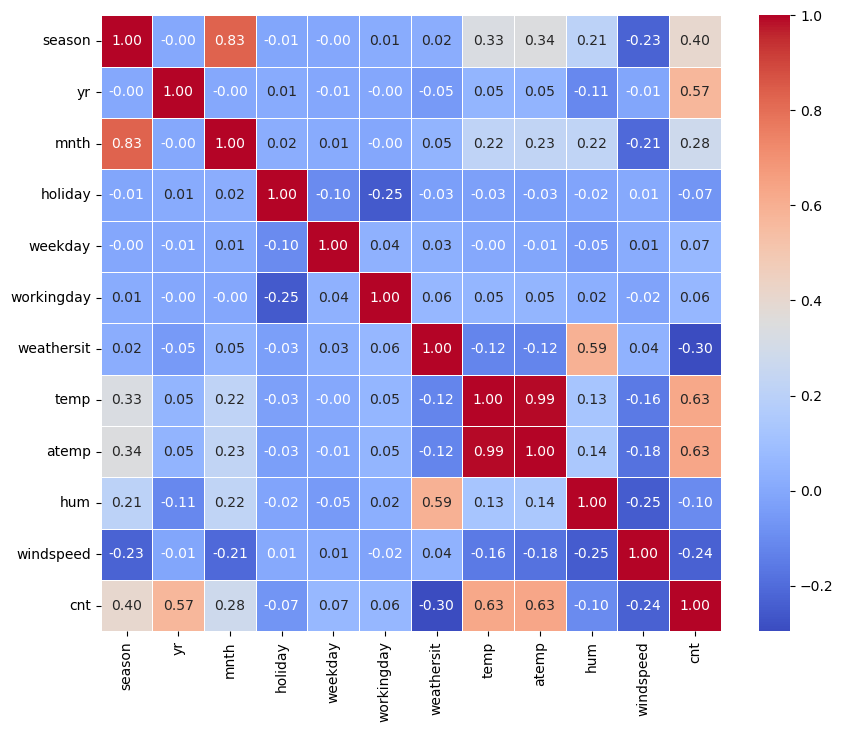

In [41]:
# heatmap on the dataframe - to see corelation between different variables

# Set the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap with annotations
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidths=0.5,fmt=".2f")

# Step - 3 : Preparing the data for Modelling


* 3.1) ENCODING:

        -- Categorical Variables to DUMMY Variables.
                -- Create dummy variables for the columns.
                -- Store the dummy values into a new dataframe.
                        -- Also drop_first=True, as we need (k-1) categorical variables for k levels
                -- Concat the original df with this new df.

    
* 3.2) Splitting into Train and Test


* 3.3) Rescaling of Variables

## 3.1 ENCODING

In [42]:
df.sample(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
538,3,1,6,0,6,0,1,29.998347,32.639600,53.4583,12.041307,7458
676,4,1,11,0,4,1,1,14.439134,17.094550,33.3478,23.304945,5315
22,1,0,1,0,0,0,1,3.957390,4.941955,43.6522,16.522200,986
434,1,1,3,0,0,0,1,14.831299,17.983500,47.6957,14.913329,4911
227,3,0,8,0,2,1,1,28.734153,32.291850,57.8333,15.834043,4725


In [43]:
# a. We need to ENCODING using DUMMY Variables for the below 4 categorical variables:
#     1. Season
#     2. Month
#     3. Weekday
#     4. Weathersit



# Creating DUMMY Variables for the above mentioned 4 columns:

df[['mnth', 'season', 'weekday', 'weathersit']]

,mnth,season,weekday,weathersit
0,1,1,6,2
1,1,1,0,2
2,1,1,1,1
3,1,1,2,1
4,1,1,3,1
...,...,...,...,...
725,12,1,4,2
726,12,1,5,2
727,12,1,6,2
728,12,1,0,1


In [44]:
# Select the columns for which you want to create dummy variables
columns_to_encode = ['mnth', 'season', 'weekday', 'weathersit']

# Create dummy variables
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)  


# In the create dummy variables, only on columns_to_encode only we are craeting dummies.
# By this we no need to CONCAT seperately

In [45]:
# Print the first few rows of the encoded DataFrame to verify
df_encoded.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [46]:
print(len(df_encoded.columns))
df_encoded.columns

30


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'season_2',
       'season_3', 'season_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [47]:
print(len(df.columns))
df.columns
#     1. Season
#     2. Month
#     3. Weekday
#     4. Weathersit

12


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [48]:
### We NO need to do the below -  CONCAT the df with df_encoded
### as we did --> pd.get_dummies(df, columns=columns_to_encode, drop_first=True)  

#df = pd.concat([df,df_encoded], axis = 1)
#df.head()


# SO just making  df a duplicate of df_encoded by overwriting everything in df

df = df_encoded.copy()

In [49]:
print(len(df.columns))
df.columns

30


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'season_2',
       'season_3', 'season_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [50]:
# Just making sure df has all the contents and is same as df_encoded

if df.equals(df_encoded):
    print("Equal")
else:
    print('Not equal')

Equal


## 3.2 Splitting into Train and Test

In [51]:
# Modules we imported for this are:

#  import sklearn
#  from sklearn.model_selection import train_test_split

In [52]:
# Splitting data into TRAIN and TEST

# TRAIN data - will have 70% of the total data
# TEST data - will have 30% of the total data

df_train , df_test = train_test_split(df , train_size = 0.3 , random_state = 100)

In [53]:
print(df_train.shape)
print(df_test.shape)


# # df shape was (730,42) after Encoding   [  219 + 511 = 730 ]

(219, 30)
(511, 30)


# 3.3 RESCALING the Faetures


    -- Here we will use MinMax scaling ( i.e., NORMALISATION) since it takes care of OUTLIERS

In [54]:
# Any Model we are building ,if there are Co-EFFICIENTS to be Interpreted, 
#  it is extremely important that all the Variables are at a COMPARABLE Scale so that the CO-EFFICIENTS are also COMPARABLE.

# For this we use RESCALING of the Features.

In [55]:
# Below module we have imported to Use:

# from sklearn.preprocessing import MinMaxScaler

#### Steps to use in  MinMaxScaling:

3.3.1 Instantiate the Object

3.3.2 Fit on data

Following Columns are Numerical which needs to be Normalised:

    temp
    hum
    windspeed
    cnt


#### 3.3.1 Instantiate the Object

In [56]:
# 1. Instantiate the Object:

scaler = MinMaxScaler()

# We only SCALE the Numeric variables

numeric_variables = ['temp', 'hum', 'windspeed', 'cnt']

In [57]:
df_train[numeric_variables]

,temp,hum,windspeed,cnt
519,24.497500,48.7083,19.083811,6998
517,23.916653,54.9167,12.499654,8120
132,21.012500,86.3333,12.041575,4105
26,7.995000,68.7500,7.627079,431
291,22.211299,89.5217,16.303713,2424
...,...,...,...,...
578,30.852500,65.9583,8.666718,7261
53,9.091299,42.3043,6.305571,1917
350,10.591653,56.0833,16.292189,2739
79,17.647835,73.7391,19.348461,2077


### 3.3.2 Fit on data

In [58]:
# 2. Fit on data:

df_train[numeric_variables] = scaler.fit_transform(df_train[numeric_variables])

In [59]:
df_train[numeric_variables].head(10)

,temp,hum,windspeed,cnt
519,0.669039,0.518413,0.518178,0.828017
517,0.648873,0.584491,0.305497,0.969487
132,0.548043,0.918865,0.290701,0.463245
26,0.096085,0.731722,0.148104,0.000000
291,0.589664,0.952799,0.428376,0.251292
292,0.495848,0.677175,0.815634,0.474593
39,0.010367,0.526609,0.310425,0.148027
204,1.000000,0.586264,0.267859,0.400328
587,0.804270,0.780060,0.348602,0.739881
588,0.816132,0.564535,0.166879,0.770773


In [60]:
df_train[numeric_variables].describe()  # it shows all the variables are between 0 and 1 ( min and max ).So MinMaxScaler worked.

,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000
mean,0.511058,0.660680,0.327204,0.510317
std,0.256364,0.148021,0.174069,0.251704
min,0.000000,0.000000,0.000000,0.000000
25%,0.283512,0.557439,0.195154,0.308851
50%,0.527876,0.659880,0.306861,0.511033
75%,0.721646,0.766534,0.413173,0.701929
max,1.000000,1.000000,1.000000,1.000000


In [61]:
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
519,1,0,1,0.669039,28.91415,0.518413,0.518178,0.828017,0,0,...,0,0,1,0,0,0,0,0,0,0
517,1,0,0,0.648873,28.31440,0.584491,0.305497,0.969487,0,0,...,0,0,0,0,0,0,0,1,0,0
132,0,0,1,0.548043,24.71500,0.918865,0.290701,0.463245,0,0,...,0,0,0,0,0,0,1,0,1,0
26,0,0,1,0.096085,10.98500,0.731722,0.148104,0.000000,0,0,...,0,0,0,0,0,1,0,0,0,0
291,0,0,1,0.589664,25.69240,0.952799,0.428376,0.251292,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.889680,35.35440,0.702009,0.181686,0.861178,0,0,...,1,0,0,0,0,1,0,0,0,0
53,0,0,1,0.134148,12.28585,0.450254,0.105417,0.187366,1,0,...,0,0,0,0,1,0,0,0,0,0
350,0,0,0,0.186239,12.46855,0.596907,0.428004,0.291010,0,0,...,0,1,0,0,0,0,0,1,1,0
79,0,0,1,0.431224,20.48675,0.784822,0.526727,0.207540,0,1,...,0,0,1,0,0,0,0,0,1,0


# Step - 4 : Training the Model

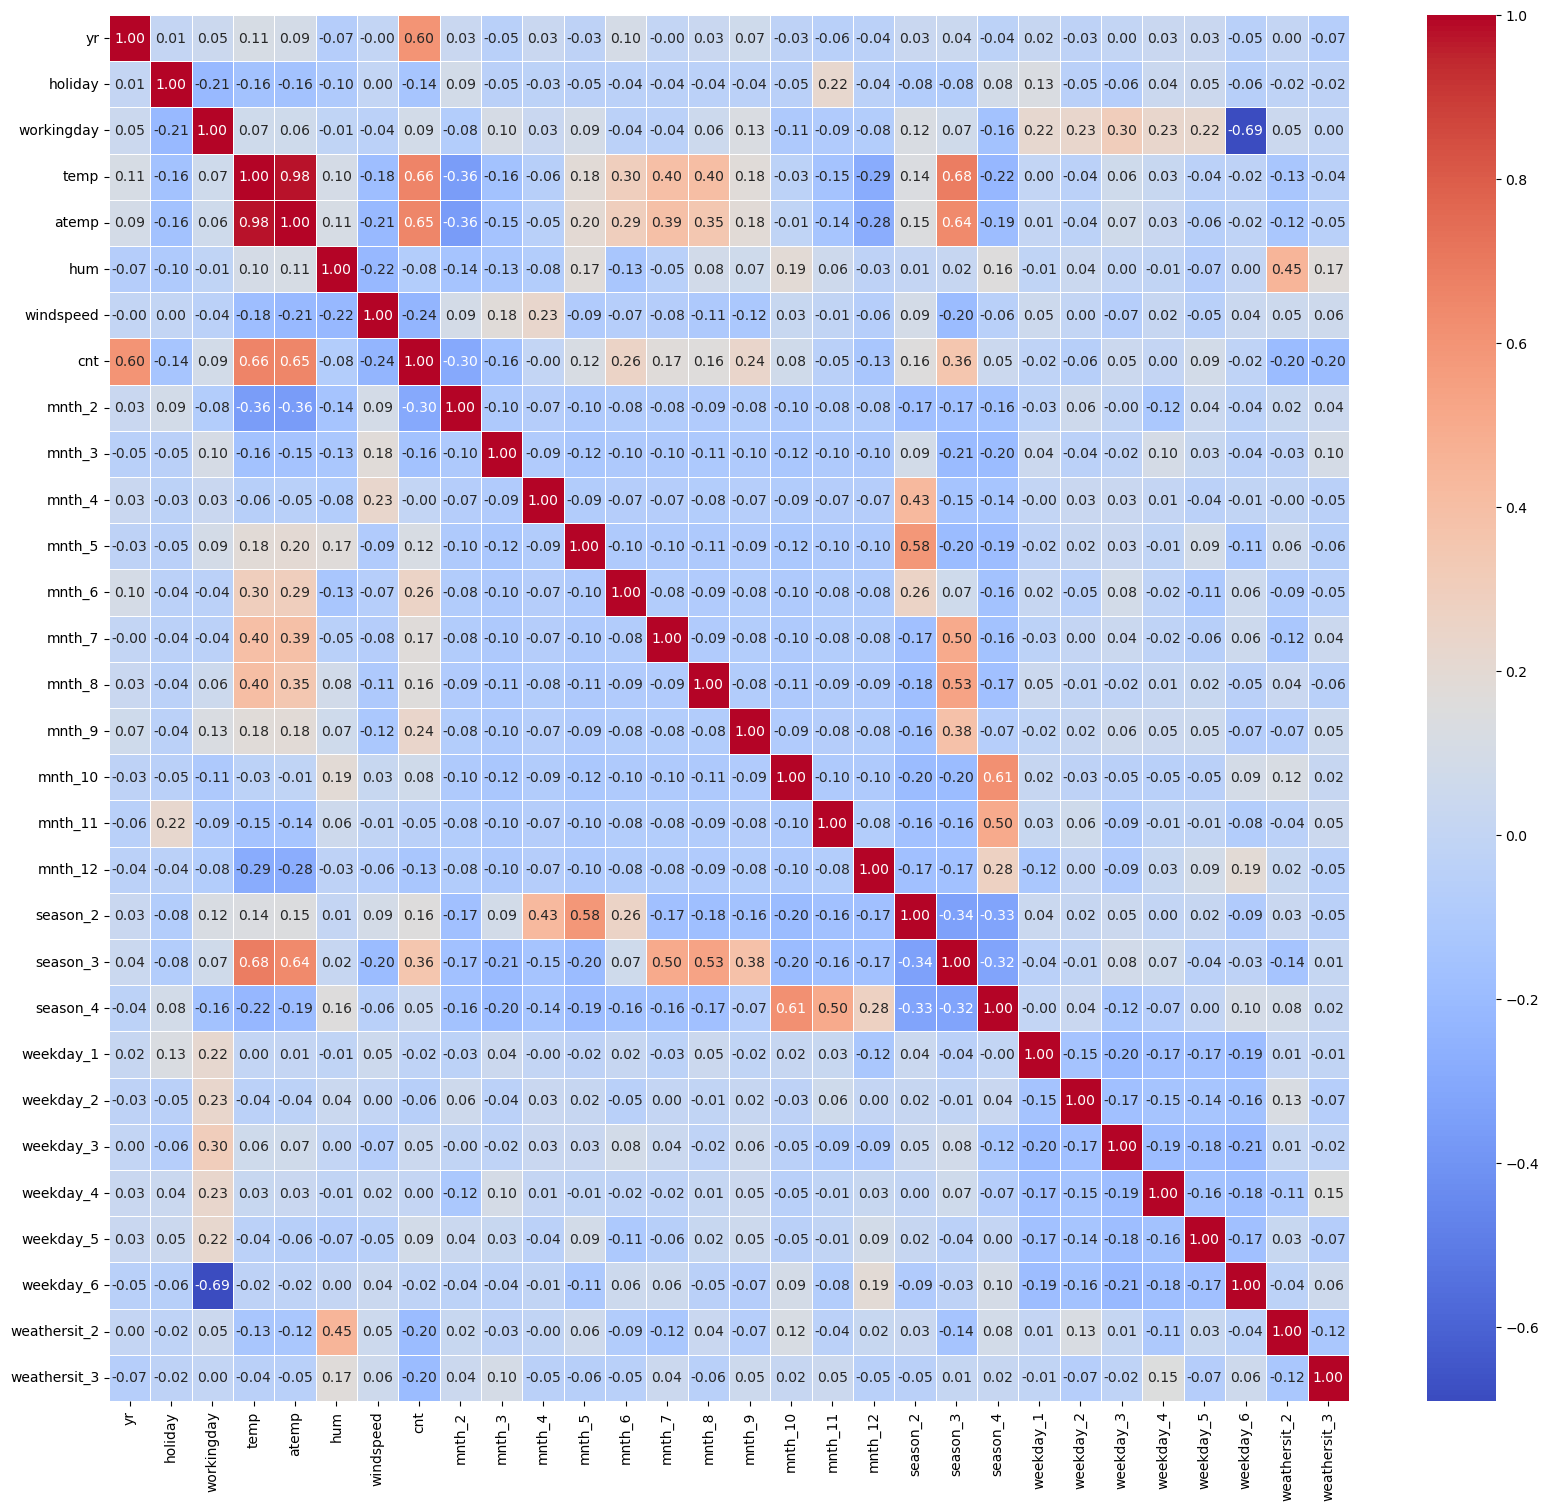

In [62]:
# Heatmap


# Set the figure size for the heatmap
plt.figure(figsize=(20,18))

# Create the heatmap with annotations
heatmap = sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm',linewidths=0.5,fmt=".2f")

plt.show()

In [63]:
# X_train , y_train

y_train = df_train.pop('cnt')     # TARGET Variable
X_train = df_train                # FEATURE Variables

In [64]:
y_train.head()

519    0.828017
517    0.969487
132    0.463245
26     0.000000
291    0.251292
Name: cnt, dtype: float64

In [65]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_2,mnth_3,mnth_4,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
519,1,0,1,0.669039,28.91415,0.518413,0.518178,0,0,0,...,0,0,1,0,0,0,0,0,0,0
517,1,0,0,0.648873,28.31440,0.584491,0.305497,0,0,0,...,0,0,0,0,0,0,0,1,0,0
132,0,0,1,0.548043,24.71500,0.918865,0.290701,0,0,0,...,0,0,0,0,0,0,1,0,1,0
26,0,0,1,0.096085,10.98500,0.731722,0.148104,0,0,0,...,0,0,0,0,0,1,0,0,0,0
291,0,0,1,0.589664,25.69240,0.952799,0.428376,0,0,0,...,0,1,0,0,1,0,0,0,0,1


# Step - 5 : Building the Model  (on Train data)


For this, we will look at:

    1. Statistical Significance of Variables

    2. VIF

## 5.1 RFE ( Recursive Feature Elimination)

In [66]:
# For this we imported the below:

# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

In [67]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [68]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
25,weekday_5,True,1
20,season_4,True,1
18,season_2,True,1
15,mnth_10,True,1
27,weathersit_2,True,1
13,mnth_8,True,1
12,mnth_7,True,1
14,mnth_9,True,1
3,temp,True,1


In [69]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_3', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'season_2', 'season_4', 'weekday_5',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [70]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_11', 'mnth_12', 'season_3', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_6'],
      dtype='object')

In [71]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [72]:
# Adding a constant variable 

# For this we imported the below
# import statsmodels.api as sm  


X_train_rfe = sm.add_constant(X_train_rfe)

In [73]:
### Running the linear model


# create the Model

lr = sm.OLS(y_train, X_train_rfe)


# FIT the Model

lr_model = lr.fit()

In [74]:
# Params

lr_model.params

const           0.227132
yr              0.260629
holiday        -0.131021
temp            0.545658
hum            -0.189490
windspeed      -0.186903
mnth_3          0.026314
mnth_7          0.027889
mnth_8          0.016027
mnth_9          0.149204
mnth_10         0.030648
season_2        0.112984
season_4        0.167132
weekday_5       0.044675
weathersit_2   -0.060557
weathersit_3   -0.191304
dtype: float64

In [75]:
# Summary of the linear model

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     87.86
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           4.99e-80
Time:                        22:13:09   Log-Likelihood:                 212.38
No. Observations:                 219   AIC:                            -392.8
Df Residuals:                     203   BIC:                            -338.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2271      0.043      5.283      0.000       0.142       0.312
yr               0.2606      0.013     19.865      0.000       0.235       0.286
holiday         -0.1310      0.049     -2.649      0.009      -0.229      -0.034
temp             0.5457      0.040     13.557      0.000       0.466       0.625
hum             -0.1895      0.056     -3.403      0.001      -0.299      -0.080
windspeed       -0.1869      0.040     -4.645      0.000      -0.266      -0.108
mnth_3           0.0263      0.022      1.197      0.233      -0.017       0.070
mnth_7           0.0279      0.034      0.814      0.417      -0.040       0.095
mnth_8           0.0160      0.033      0.483      0.630      -0.049       0.082
mnth_9           0.1492      0.031      4.795      0.000       0.088       0.211
mnth_10          0.0306      0.028      1.093      0.276      -0.025       0.086
season_2         0.1130      0.021      5.491      0.000       0.072       0.154
season_4         0.1671      0.022      7.628      0.000       0.124       0.210
weekday_5        0.0447      0.019      2.311      0.022       0.007       0.083
weathersit_2    -0.0606      0.017     -3.612      0.000      -0.094      -0.027
weathersit_3    -0.1913      0.039     -4.872      0.000      -0.269      -0.114
==============================================================================
Omnibus:                       49.135   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.933
Skew:                          -0.959   Prob(JB):                     5.01e-30
Kurtosis:                       6.333   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Calculate the VIFs for the new model

# For this we imported the below:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.57
3,temp,2.56
8,mnth_8,2.11
12,season_4,2.10
7,mnth_7,2.03
11,season_2,1.94
10,mnth_10,1.78
4,hum,1.63
9,mnth_9,1.49
14,weathersit_2,1.46


In [77]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,mnth_3,mnth_7,mnth_8,mnth_9,mnth_10,season_2,season_4,weekday_5,weathersit_2,weathersit_3
519,1.0,1,0,0.669039,0.518413,0.518178,0,0,0,0,0,1,0,0,0,0
517,1.0,1,0,0.648873,0.584491,0.305497,0,0,0,0,0,1,0,0,0,0
132,1.0,0,0,0.548043,0.918865,0.290701,0,0,0,0,0,1,0,1,1,0
26,1.0,0,0,0.096085,0.731722,0.148104,0,0,0,0,0,0,0,0,0,0
291,1.0,0,0,0.589664,0.952799,0.428376,0,0,0,0,1,0,1,0,0,1


#### Checking what columns can be dropped based on P-Value:

From the summary, we can see that the below 4 has P-Values > 0.05

    mnth_3	 0.233
    mnth_7	 0.417
    mnth_8	 0.630
    mnth_10	 0.276

In [78]:
# Dropping the 'mth_8' column as it has P-Value of 0.630
X_train_rfe = X_train_rfe.drop(['mnth_8'], axis=1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Create the Model
lr = sm.OLS(y_train, X_train_rfe)

# FIt the model
lr_model = lr.fit()

# Summary of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     94.48
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           5.65e-81
Time:                        22:13:10   Log-Likelihood:                 212.26
No. Observations:                 219   AIC:                            -394.5
Df Residuals:                     204   BIC:                            -343.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2250      0.043      5.271      0.000       0.141       0.309
yr               0.2604      0.013     19.897      0.000       0.235       0.286
holiday         -0.1310      0.049     -2.655      0.009      -0.228      -0.034
temp             0.5577      0.031     17.739      0.000       0.496       0.620
hum             -0.1883      0.056     -3.391      0.001      -0.298      -0.079
windspeed       -0.1869      0.040     -4.654      0.000      -0.266      -0.108
mnth_3           0.0247      0.022      1.139      0.256      -0.018       0.067
mnth_7           0.0189      0.029      0.658      0.511      -0.038       0.075
mnth_9           0.1425      0.028      5.121      0.000       0.088       0.197
mnth_10          0.0284      0.028      1.028      0.305      -0.026       0.083
season_2         0.1075      0.017      6.283      0.000       0.074       0.141
season_4         0.1645      0.021      7.762      0.000       0.123       0.206
weekday_5        0.0453      0.019      2.352      0.020       0.007       0.083
weathersit_2    -0.0599      0.017     -3.591      0.000      -0.093      -0.027
weathersit_3    -0.1909      0.039     -4.872      0.000      -0.268      -0.114
==============================================================================
Omnibus:                       48.757   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.980
Skew:                          -0.957   Prob(JB):                     2.19e-29
Kurtosis:                       6.287   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.09
11,season_4,1.97
9,mnth_10,1.73
4,hum,1.63
3,temp,1.57
13,weathersit_2,1.45
7,mnth_7,1.43
10,season_2,1.35
8,mnth_9,1.20
5,windspeed,1.18


In [80]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_3',
       'mnth_7', 'mnth_9', 'mnth_10', 'season_2', 'season_4', 'weekday_5',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

# Checking what columns can be dropped based on P-Value:

From the summary, we can see that the below 4 has P-Values > 0.05

    mnth_3	 0.233  --> 0.256
    mnth_7	 0.417  --> 0.511
    mnth_8	 0.630  --> Dropped already
    mnth_10	 0.276  --> 0.305

In [81]:
# Dropping the 'mth_7' column as it has P-Value of 0.630
X_train_rfe = X_train_rfe.drop(['mnth_7'], axis=1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Create the Model
lr = sm.OLS(y_train, X_train_rfe)

# FIt the model
lr_model = lr.fit()

# Summary of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     102.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           6.79e-82
Time:                        22:13:10   Log-Likelihood:                 212.03
No. Observations:                 219   AIC:                            -396.1
Df Residuals:                     205   BIC:                            -348.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2256      0.043      5.294      0.000       0.142       0.310
yr               0.2601      0.013     19.914      0.000       0.234       0.286
holiday         -0.1312      0.049     -2.661      0.008      -0.228      -0.034
temp             0.5665      0.028     19.929      0.000       0.510       0.623
hum             -0.1905      0.055     -3.442      0.001      -0.300      -0.081
windspeed       -0.1870      0.040     -4.661      0.000      -0.266      -0.108
mnth_3           0.0234      0.022      1.083      0.280      -0.019       0.066
mnth_9           0.1379      0.027      5.128      0.000       0.085       0.191
mnth_10          0.0269      0.027      0.981      0.328      -0.027       0.081
season_2         0.1038      0.016      6.431      0.000       0.072       0.136
season_4         0.1629      0.021      7.749      0.000       0.121       0.204
weekday_5        0.0449      0.019      2.336      0.020       0.007       0.083
weathersit_2    -0.0600      0.017     -3.604      0.000      -0.093      -0.027
weathersit_3    -0.1886      0.039     -4.840      0.000      -0.265      -0.112
==============================================================================
Omnibus:                       47.096   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.354
Skew:                          -0.929   Prob(JB):                     6.02e-28
Kurtosis:                       6.207   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.07
10,season_4,1.94
8,mnth_10,1.72
4,hum,1.62
12,weathersit_2,1.45
3,temp,1.28
9,season_2,1.20
5,windspeed,1.18
6,mnth_3,1.14
13,weathersit_3,1.14


# Checking what columns can be dropped based on P-Value:

From the summary, we can see that the below 4 has P-Values > 0.05

    mnth_3	 0.233  --> 0.256 --> 0.280
    mnth_7	 0.417  --> 0.511 --> Dropped already
    mnth_8	 0.630  --> Dropped already
    mnth_10	 0.276  --> 0.305 --> 0.328

In [83]:
# Dropping the 'mth_10' column as it has P-Value of 0.630
X_train_rfe = X_train_rfe.drop(['mnth_10'], axis=1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Create the Model
lr = sm.OLS(y_train, X_train_rfe)

# FIt the model
lr_model = lr.fit()

# Summary of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     110.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.02e-82
Time:                        22:13:10   Log-Likelihood:                 211.51
No. Observations:                 219   AIC:                            -397.0
Df Residuals:                     206   BIC:                            -353.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2193      0.042      5.206      0.000       0.136       0.302
yr               0.2600      0.013     19.910      0.000       0.234       0.286
holiday         -0.1358      0.049     -2.767      0.006      -0.233      -0.039
temp             0.5707      0.028     20.299      0.000       0.515       0.626
hum             -0.1860      0.055     -3.372      0.001      -0.295      -0.077
windspeed       -0.1826      0.040     -4.581      0.000      -0.261      -0.104
mnth_3           0.0236      0.022      1.096      0.274      -0.019       0.066
mnth_9           0.1355      0.027      5.060      0.000       0.083       0.188
season_2         0.1030      0.016      6.388      0.000       0.071       0.135
season_4         0.1749      0.017     10.248      0.000       0.141       0.209
weekday_5        0.0443      0.019      2.304      0.022       0.006       0.082
weathersit_2    -0.0593      0.017     -3.565      0.000      -0.092      -0.027
weathersit_3    -0.1887      0.039     -4.843      0.000      -0.266      -0.112
==============================================================================
Omnibus:                       43.002   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.992
Skew:                          -0.861   Prob(JB):                     1.30e-24
Kurtosis:                       6.015   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,43.09
4,hum,1.61
11,weathersit_2,1.45
9,season_4,1.28
3,temp,1.26
8,season_2,1.20
5,windspeed,1.16
6,mnth_3,1.14
12,weathersit_3,1.14
7,mnth_9,1.11


# Checking what columns can be dropped based on P-Value:

From the summary, we can see that the below 4 has P-Values > 0.05

    mnth_3	 0.233  --> 0.256 --> 0.280 --> 0.274
    mnth_7	 0.417  --> 0.511 --> Dropped already
    mnth_8	 0.630  --> Dropped already
    mnth_10	 0.276  --> 0.305 --> 0.328 --> Dropped already

In [85]:
# Dropping the 'mth_3' column as it has P-Value of 0.630
X_train_rfe = X_train_rfe.drop(['mnth_3'], axis=1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Create the Model
lr = sm.OLS(y_train, X_train_rfe)

# FIt the model
lr_model = lr.fit()

# Summary of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     120.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.64e-83
Time:                        22:13:10   Log-Likelihood:                 210.88
No. Observations:                 219   AIC:                            -397.8
Df Residuals:                     207   BIC:                            -357.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2267      0.042      5.450      0.000       0.145       0.309
yr               0.2594      0.013     19.873      0.000       0.234       0.285
holiday         -0.1394      0.049     -2.847      0.005      -0.236      -0.043
temp             0.5657      0.028     20.381      0.000       0.511       0.620
hum             -0.1899      0.055     -3.449      0.001      -0.299      -0.081
windspeed       -0.1781      0.040     -4.490      0.000      -0.256      -0.100
mnth_9           0.1335      0.027      4.994      0.000       0.081       0.186
season_2         0.1033      0.016      6.407      0.000       0.072       0.135
season_4         0.1711      0.017     10.235      0.000       0.138       0.204
weekday_5        0.0451      0.019      2.350      0.020       0.007       0.083
weathersit_2    -0.0592      0.017     -3.560      0.000      -0.092      -0.026
weathersit_3    -0.1842      0.039     -4.751      0.000      -0.261      -0.108
==============================================================================
Omnibus:                       42.134   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.896
Skew:                          -0.847   Prob(JB):                     6.14e-24
Kurtosis:                       5.975   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,41.99
4,hum,1.60
10,weathersit_2,1.45
8,season_4,1.23
3,temp,1.22
7,season_2,1.20
5,windspeed,1.15
11,weathersit_3,1.13
6,mnth_9,1.11
2,holiday,1.04


In [87]:
X_train_rfe.shape

(219, 12)

### All the P-Values of features are under 0.05
### All the VIF values of features are under control

# Step - 6 : Residual Analysis of Train data

In [88]:
# Calculation the Predicted value:

y_train_pred = lr_model.predict(X_train_rfe)

In [89]:
y_train_pred.shape

(219,)

In [90]:
y_train.shape

(219,)

In [91]:
# Calculating RESIDUAL

res =  y_train_pred - y_train

In [92]:
res.shape

(219,)

In [93]:
res.head()

519   -0.050858
517   -0.178409
132   -0.063630
26     0.115733
291    0.038643
dtype: float64

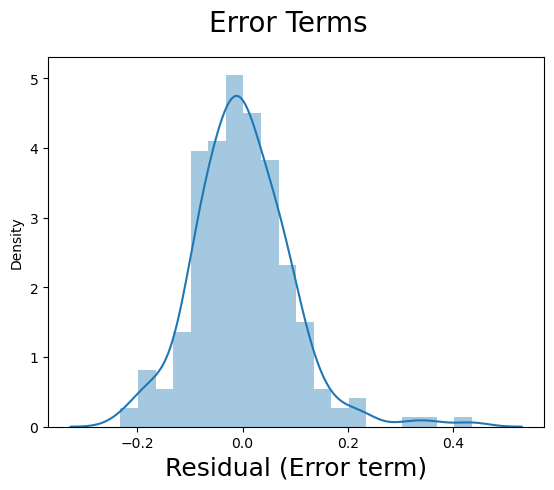

In [94]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Residual (Error term)', fontsize = 18)          # X-label
plt.show()

## Observation - 9:

    1. The above Distribution Plot shows the ERROR Terms --> ( y_train - y_train_pred )
    2. The distribution must be centered around 0 and approximately Normal - this matches with the above Plot

# Step - 7 : Predictions and Evaluations on the Test set



    1. We need to do the same TRANSFORMATION on TEST set that we did on the TRAINING Set.

    2. We never use "fit()" on TEST set

In [95]:
## we do the same steps we Performed during MinMaxScaler

## Variables remain the same for TEST dataset


# Create List of NUMERIC Variables as we only SCALE the Numeric variables

numeric_variables = ['temp', 'hum', 'windspeed', 'cnt']


# 2. Fit on data:

df_test[numeric_variables] = scaler.transform(df_test[numeric_variables])  
df_test.head(3)

# we use TRANSFORM() here. NOT - fit_transform()
# We use df_test instead of df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.852907,33.27085,0.678949,0.078074,0.707603,0,0,...,1,0,1,0,0,0,0,0,1,0
535,1,0,1,0.932384,36.04875,0.630167,0.148050,0.728786,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.487544,22.85230,0.865206,0.329739,0.280923,0,0,...,0,1,0,0,0,1,0,0,1,0


In [96]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.510763,0.033268,0.673190,0.529510,23.928381,0.671171,0.308376,0.515664,0.076321,0.072407,...,0.260274,0.246575,0.138943,0.154599,0.123288,0.142857,0.146771,0.135029,0.346380,0.027397
std,0.500374,0.179512,0.469507,0.262488,8.190998,0.153050,0.164944,0.241011,0.265771,0.259415,...,0.439214,0.431440,0.346226,0.361876,0.329089,0.350270,0.354224,0.342090,0.476282,0.163398
min,0.000000,0.000000,0.000000,-0.097323,3.953480,0.270516,-0.049804,-0.051570,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.304864,16.981550,0.552339,0.192476,0.356449,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.530249,24.399800,0.671410,0.288013,0.521750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.754448,30.556050,0.781168,0.403772,0.696633,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.045078,42.044800,1.035053,0.814264,1.044383,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
y_test = df_test.pop('cnt')   # TARGET Variable

X_test = df_test          # FEATURE Variable


In [98]:
# Add a CONSTANT

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_2,mnth_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,1.0,0,1,0,0.852907,33.27085,0.678949,0.078074,0,0,...,1,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.932384,36.04875,0.630167,0.148050,0,0,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,0.487544,22.85230,0.865206,0.329739,0,0,...,0,1,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.909846,34.24915,0.451450,0.335139,0,0,...,1,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.836299,32.19710,0.324618,0.534310,0,0,...,0,0,0,0,0,1,0,0,0,0


In [99]:
X_test_sm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'season_2',
       'season_3', 'season_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [100]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_9',
       'season_2', 'season_4', 'weekday_5', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [101]:
# Taking the same columns we used in TEST and storing it in a New df.

X_test_new  =  X_test_sm[X_train_rfe.columns]    

In [102]:
X_test_new

,const,yr,holiday,temp,hum,windspeed,mnth_9,season_2,season_4,weekday_5,weathersit_2,weathersit_3
184,1.0,0,1,0.852907,0.678949,0.078074,0,0,0,0,1,0
535,1.0,1,0,0.932384,0.630167,0.148050,0,1,0,0,0,0
299,1.0,0,0,0.487544,0.865206,0.329739,0,0,1,0,1,0
221,1.0,0,0,0.909846,0.451450,0.335139,0,0,0,0,0,0
152,1.0,0,0,0.836299,0.324618,0.534310,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
428,1.0,1,0,0.164887,0.538813,0.397036,0,0,0,0,0,0
308,1.0,0,0,0.283512,0.552561,0.310908,0,0,1,0,0,0
476,1.0,1,0,0.383156,0.889153,0.647411,0,1,0,0,0,1
463,1.0,1,0,0.514828,0.337922,0.676952,0,1,0,0,0,0


In [103]:
# PREDICTing Test data

y_test_pred = lr_model.predict(X_test_new)

In [104]:
y_test.shape

(511,)

In [105]:
y_test_pred.shape

(511,)

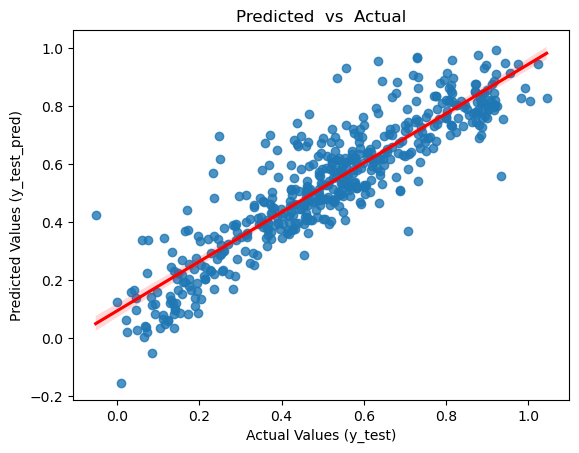

In [106]:
# Create a regression plot
sns.regplot(x=y_test, y=y_test_pred, line_kws={'color':'red'})

# Add labels and a title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_pred)')
plt.title('Predicted  vs  Actual')


plt.show()

# Step - 8 : Model Evaluation

In [107]:
# EVALUATE the Model:

# For this we use the below module
# from sklearn.metrics import r2_score

r2_score(y_true=y_test , y_pred=y_test_pred)

0.8014617653236281

## Observation - 10:

* Based on the r2_score, we can conclude that our model is a "Good Fit".

* r2_score of 0.80 means, that approximately 80% of the variance in the dependent variable can be explained by the independent variables in your model.